In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [5]:
company=pd.read_csv("C:\\Users\\prasa\\Downloads\\Company_Data.csv")
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [6]:
company.info

<bound method DataFrame.info of      Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Ed

In [7]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [9]:
company.isnull().sum()   #There are no missing values

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [11]:
company.Sales.value_counts()

7.80    4
6.20    3
6.67    3
8.77    3
6.88    3
       ..
7.50    1
8.89    1
7.58    1
5.64    1
8.14    1
Name: Sales, Length: 336, dtype: int64

In [10]:
## In the above data there is some categorical data, so we need to convert that into numerical data.

In [23]:
label_encoder = preprocessing.LabelEncoder()
company['ShelveLoc']=label_encoder.fit_transform(company['ShelveLoc'])
company['ShelveLoc']

0      0
1      1
2      2
3      2
4      0
      ..
395    1
396    2
397    2
398    0
399    1
Name: ShelveLoc, Length: 400, dtype: int64

In [15]:
label_encoder = preprocessing.LabelEncoder()
company['Urban']=label_encoder.fit_transform(company['Urban'])
company['Urban']

0      1
1      1
2      1
3      1
4      1
      ..
395    1
396    0
397    1
398    1
399    1
Name: Urban, Length: 400, dtype: int32

In [16]:
label_encoder = preprocessing.LabelEncoder()
company['US']=label_encoder.fit_transform(company['US'])
company['US']

0      1
1      1
2      1
3      1
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: US, Length: 400, dtype: int32

In [21]:
company.head() ## now all the data is converted into numerical 

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [44]:
# The target variable is continuous so make it categorical.  

In [45]:
status = []
for value in company["Sales"]:
     if value<=7.49:
        status.append("low")
     else:
        status.append("high")

company["status"]= status

In [46]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,status
0,9.50,138,73,11,276,120,0,42,17,1,1,high
1,11.22,111,48,16,260,83,1,65,10,1,1,high
2,10.06,113,35,10,269,80,2,59,12,1,1,high
3,7.40,117,100,4,466,97,2,55,14,1,1,low
4,4.15,141,64,3,340,128,0,38,13,1,0,low


In [47]:
x = company.iloc[:, 1:11]
y = company['status']

In [48]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [49]:
y

0      high
1      high
2      high
3       low
4       low
       ... 
395    high
396     low
397     low
398     low
399    high
Name: status, Length: 400, dtype: object

In [ ]:
# Now devide the data for training and testing purpose. Here im considering 30% data for testing.
# Random state is a number which we can give any number between 1 to 45. if we dont give random state each time we execute the code the output will vary.

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

## Building Decision Tree Using Entropy

In [51]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [52]:
preds = model.predict(x_test)
preds

array(['high', 'low', 'high', 'low', 'high', 'low', 'high', 'low', 'high',
       'high', 'high', 'high', 'high', 'high', 'low', 'high', 'low',
       'high', 'high', 'high', 'high', 'low', 'low', 'high', 'low',
       'high', 'high', 'high', 'high', 'low', 'high', 'high', 'high',
       'low', 'high', 'high', 'low', 'high', 'high', 'low', 'low', 'low',
       'high', 'high', 'low', 'high', 'high', 'high', 'low', 'high',
       'high', 'high', 'high', 'high', 'high', 'low', 'high', 'high',
       'high', 'high', 'high', 'high', 'low', 'low', 'high', 'high',
       'high', 'high', 'low', 'high', 'low', 'high', 'high', 'low', 'low',
       'low', 'high', 'high', 'low', 'low', 'high', 'high', 'low', 'low',
       'high', 'high', 'high', 'high', 'low', 'high', 'high', 'high',
       'high', 'high', 'low', 'high', 'high', 'high', 'low', 'high',
       'low', 'high', 'high', 'high', 'low', 'high', 'high', 'high',
       'low', 'high', 'high', 'high', 'high', 'low', 'low', 'low', 'low',
     

## Plot the DecisionTree

In [54]:
x_test.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

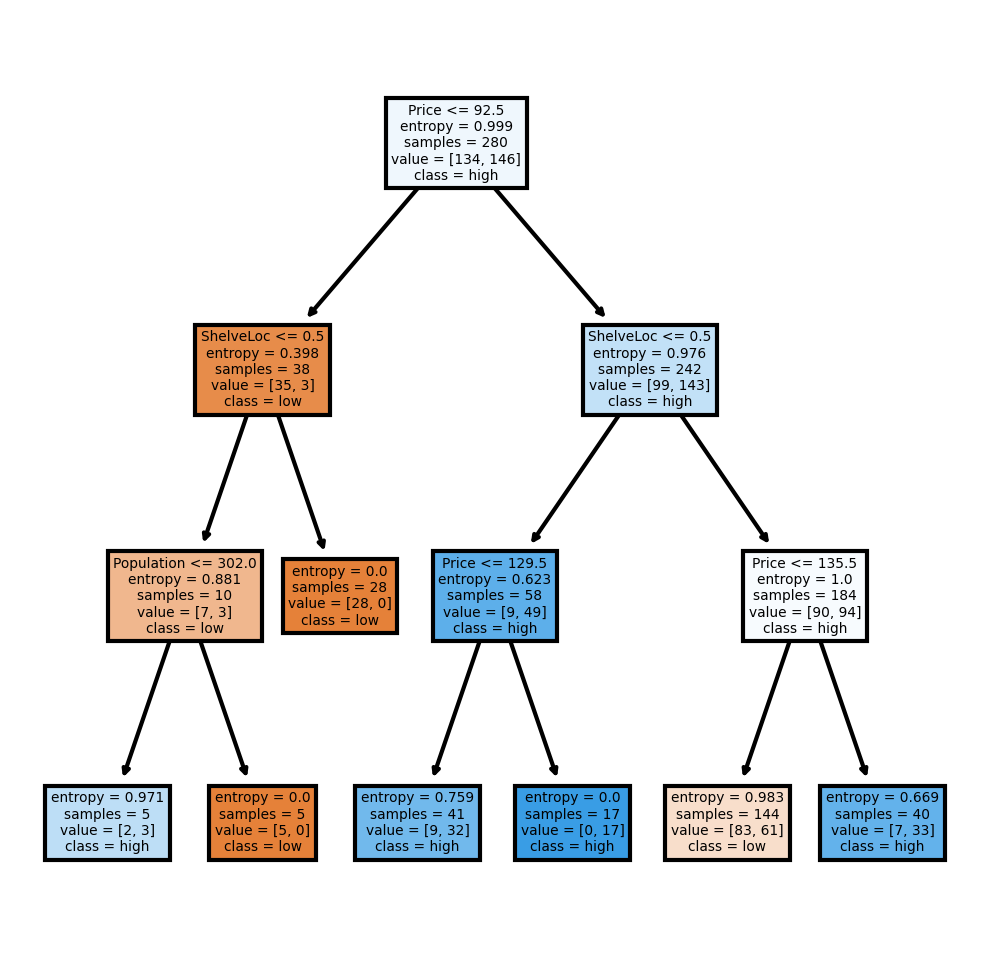

In [57]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['low', 'high']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model, feature_names = fn, class_names=cn, filled = True);
plt.savefig('DT_Entropy.pdf')

In [58]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category

high    81
low     39
dtype: int64

In [59]:
#Accuracy
model.score(x_test, y_test)

0.6833333333333333

In [61]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,high,low
status,,
high,54,11
low,27,28


## Building Decision Tree Classifier (CART) using Gini Criteria

In [69]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

In [70]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

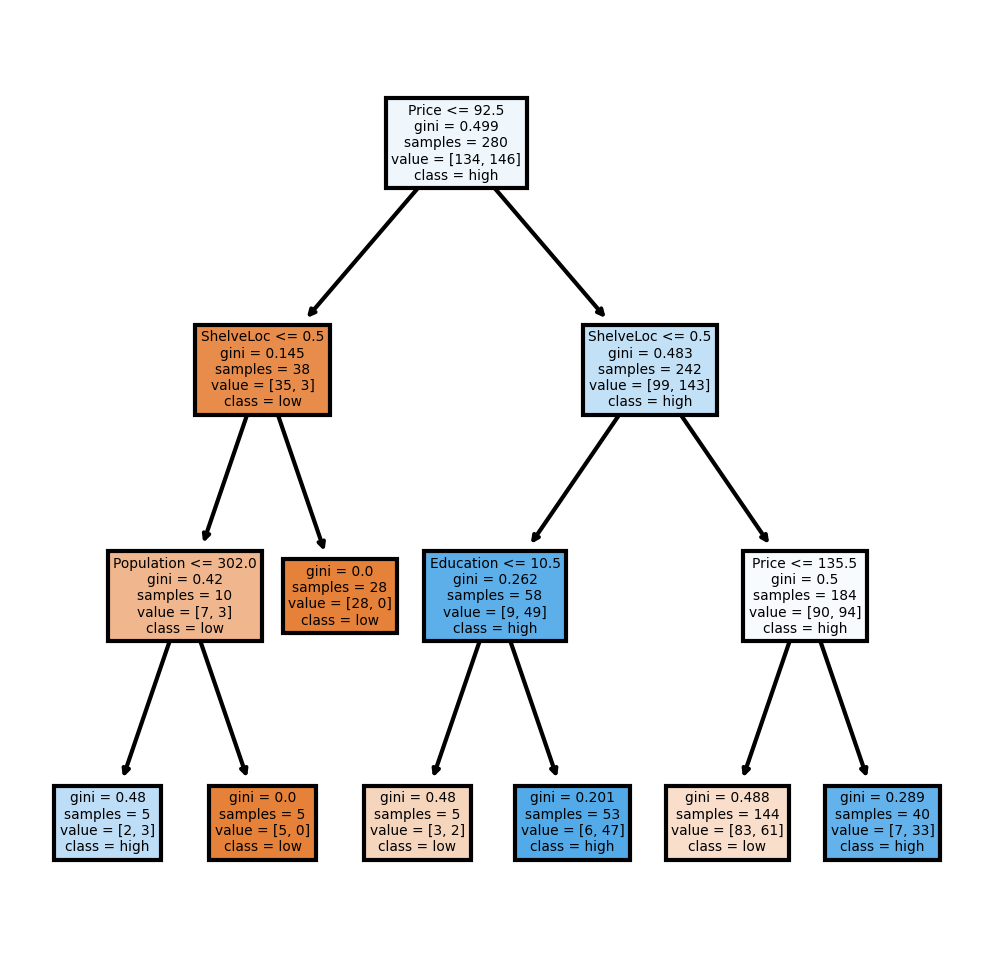

In [71]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['low', 'high']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_gini, feature_names = fn, class_names=cn, filled = True);

In [73]:
#Prediction and computing the accuracy
pred = model_gini.predict(x_test)
model_gini.score(x_train, y_train)


0.7214285714285714

#### From the Above Decision tree we can understand which segments cause high in sales. 

### Using gini criteria we got the best accuracy